<a href="https://colab.research.google.com/github/Jaehwi-So/DeepLearning_Study/blob/main/DL05_RNN%2C_LSTM%2C_GRU_%EC%8B%9C%EA%B3%84%EC%97%B4%EB%8D%B0%EC%9D%B4%ED%84%B0%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir('drive/MyDrive/DL2024_201810776/week11/')

%load_ext autoreload
%autoreload 2

In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dense
import matplotlib.pyplot as plt
from utils import plot_learning_curves, decode_imdb, sentence_to_vector

# 임의의 신호 시계열 데이터 생성
임의로 시간마다 변화하는 시계열 데이터를 생성한다.
Input의 차원은 100 * 2고, 1개의 Output을 가진다.

In [6]:
def signal_two():
  X_data = []
  y_data = []

  for i in range(2500):
      lst = np.random.rand(100)
      idx = np.random.choice(100, 2, replace = False)
      zeros = np.zeros(100)
      zeros[idx] = 1
      X_data.append(np.array(list(zip(zeros, lst))))
      y_data.append(np.prod(lst[idx]))
  X_data = np.array(X_data)
  y_data = np.array(y_data)

  return X_data, y_data

In [8]:
X_data, y_data = signal_two()

In [9]:
X_data.shape, y_data.shape

((2500, 100, 2), (2500,))

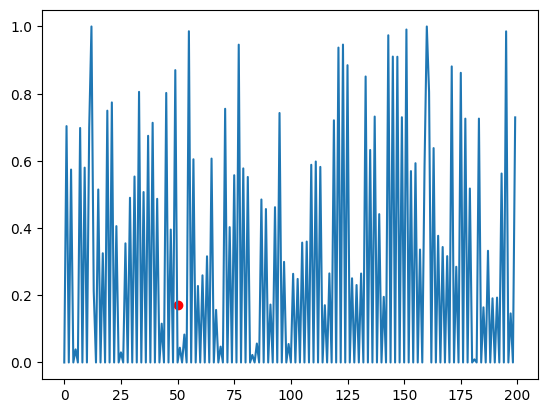

In [14]:
idx = 33
plt.plot(X_data[idx].flatten())
plt.scatter(50, y_data[idx], color = 'red')
plt.show()


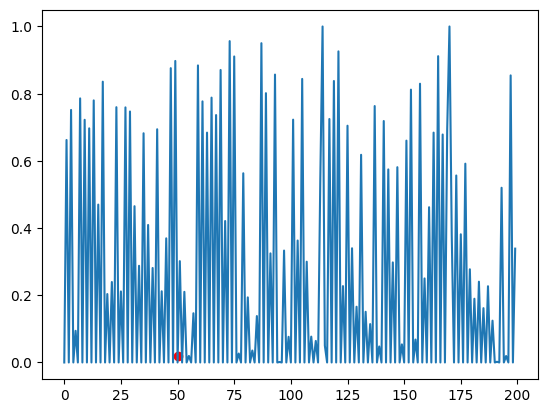

In [18]:
idx = 200
plt.plot(X_data[idx].flatten())
plt.scatter(50, y_data[idx], color = 'red')
plt.show()

# RNN & LSTM & GRU 모델 생성

In [19]:
rnn_model = Sequential([
        # Hidden Layer Node 30개, input size [100, 2]
        SimpleRNN(30, return_sequences=True, input_shape=[100, 2]),
        SimpleRNN(30), # 2개 층 사용
        Dense(1) # 마지막 출력층은 단일 출력
    ])
rnn_model.compile(optimizer='adam', loss='mse')
rnn_model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 100, 30)           990       
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 30)                1830      
                                                                 
 dense (Dense)               (None, 1)                 31        
                                                                 
Total params: 2851 (11.14 KB)
Trainable params: 2851 (11.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
lstm_model = Sequential([
        # Hidden Layer Node 30개, input size [100, 2]
        LSTM(30, return_sequences=True, input_shape=[100, 2]),
        LSTM(30), # 2개 층 사용
        Dense(1) # 마지막 출력층은 단일 출력
    ])
lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 30)           3960      
                                                                 
 lstm_1 (LSTM)               (None, 30)                7320      
                                                                 
 dense_1 (Dense)             (None, 1)                 31        
                                                                 
Total params: 11311 (44.18 KB)
Trainable params: 11311 (44.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
gru_model = Sequential([
        # Hidden Layer Node 30개, input size [100, 2]
        GRU(30, return_sequences=True, input_shape=[100, 2]),
        GRU(30), # 2개 층 사용
        Dense(1) # 마지막 출력층은 단일 출력
    ])
gru_model.compile(optimizer='adam', loss='mse')
gru_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 100, 30)           3060      
                                                                 
 gru_1 (GRU)                 (None, 30)                5580      
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 8671 (33.87 KB)
Trainable params: 8671 (33.87 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# 모델 학습

In [22]:
rnn_history = rnn_model.fit(X_data, y_data, epochs=100, validation_split=0.2)

Epoch 1/100
63/63 [==============================] - 6s 61ms/step - loss: 0.0794 - val_loss: 0.0508
Epoch 2/100
63/63 [==============================] - 2s 37ms/step - loss: 0.0538 - val_loss: 0.0518
Epoch 3/100
63/63 [==============================] - 2s 36ms/step - loss: 0.0509 - val_loss: 0.0500
Epoch 4/100
63/63 [==============================] - 2s 35ms/step - loss: 0.0508 - val_loss: 0.0500
Epoch 5/100
63/63 [==============================] - 3s 42ms/step - loss: 0.0515 - val_loss: 0.0495
Epoch 6/100
63/63 [==============================] - 4s 66ms/step - loss: 0.0518 - val_loss: 0.0651
Epoch 7/100
63/63 [==============================] - 2s 36ms/step - loss: 0.0516 - val_loss: 0.0496
Epoch 8/100
63/63 [==============================] - 2s 35ms/step - loss: 0.0494 - val_loss: 0.0492
Epoch 9/100
63/63 [==============================] - 2s 36ms/step - loss: 0.0508 - val_loss: 0.0498
Epoch 10/100
63/63 [==============================] - 2s 35ms/step - loss: 0.0506 - val_loss: 0.0511

In [23]:
lstm_history = lstm_model.fit(X_data, y_data, epochs=100, validation_split=0.2)

Epoch 1/100
63/63 [==============================] - 9s 86ms/step - loss: 0.0520 - val_loss: 0.0499
Epoch 2/100
63/63 [==============================] - 6s 92ms/step - loss: 0.0492 - val_loss: 0.0484
Epoch 3/100
63/63 [==============================] - 5s 83ms/step - loss: 0.0492 - val_loss: 0.0490
Epoch 4/100
63/63 [==============================] - 5s 72ms/step - loss: 0.0497 - val_loss: 0.0488
Epoch 5/100
63/63 [==============================] - 6s 99ms/step - loss: 0.0496 - val_loss: 0.0482
Epoch 6/100
63/63 [==============================] - 5s 75ms/step - loss: 0.0496 - val_loss: 0.0487
Epoch 7/100
63/63 [==============================] - 5s 72ms/step - loss: 0.0493 - val_loss: 0.0487
Epoch 8/100
63/63 [==============================] - 6s 104ms/step - loss: 0.0500 - val_loss: 0.0482
Epoch 9/100
63/63 [==============================] - 5s 72ms/step - loss: 0.0495 - val_loss: 0.0481
Epoch 10/100
63/63 [==============================] - 5s 74ms/step - loss: 0.0495 - val_loss: 0.048

In [24]:
gru_history = gru_model.fit(X_data, y_data, epochs=100, validation_split=0.2)

Epoch 1/100
63/63 [==============================] - 11s 124ms/step - loss: 0.0523 - val_loss: 0.0504
Epoch 2/100
63/63 [==============================] - 5s 76ms/step - loss: 0.0499 - val_loss: 0.0523
Epoch 3/100
63/63 [==============================] - 6s 97ms/step - loss: 0.0498 - val_loss: 0.0487
Epoch 4/100
63/63 [==============================] - 6s 87ms/step - loss: 0.0498 - val_loss: 0.0483
Epoch 5/100
63/63 [==============================] - 5s 76ms/step - loss: 0.0496 - val_loss: 0.0483
Epoch 6/100
63/63 [==============================] - 7s 110ms/step - loss: 0.0495 - val_loss: 0.0488
Epoch 7/100
63/63 [==============================] - 5s 78ms/step - loss: 0.0496 - val_loss: 0.0482
Epoch 8/100
63/63 [==============================] - 5s 78ms/step - loss: 0.0494 - val_loss: 0.0482
Epoch 9/100
63/63 [==============================] - 7s 107ms/step - loss: 0.0490 - val_loss: 0.0482
Epoch 10/100
63/63 [==============================] - 5s 78ms/step - loss: 0.0491 - val_loss: 0.

# 모델 비교 및 평가
Train과 Test의 Loss를 Plot시켜 RNN. LSTM, GRU의 성능을 비교한다
- Simple RNN : Loss가 Epochs에 따라 오히려 증가하는 것을 확인할 수 있는데 장기 의존성 문제로 인해 긴 시퀀스를 처리할 때 그레디언트가 소실되거나 폭주할 수 있다. 이 경우에는 역전파 과정에서 그레디언트가 제대로 전파되지 않아 학습이 어려워질 수 있다.
- LSTM, GRU : 반면 LSTM과 GRU에서는 Loss가 감소하였고 장기 의존성 문제를 해결하여 Test Set과 Train Set의 Loss의 차이가 거의 나지 않는 것을 확인할 수 있다.
- GRU가 LSTM에 비해서 학습 속도가 빨랐다. LSTM의 매개변수가 많기 때문에 계산이 오래 걸린다는 단점을 개선했다는 것을확인하였다.

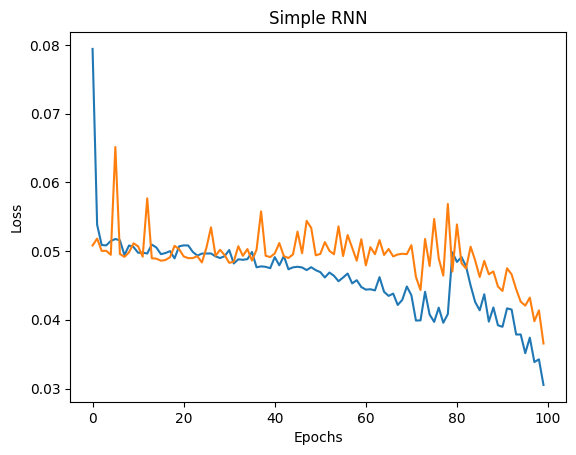

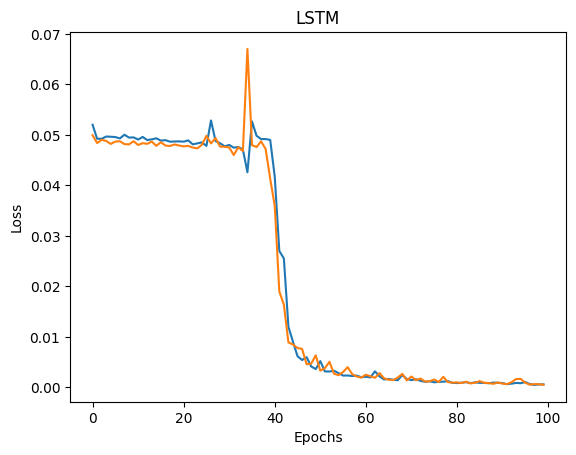

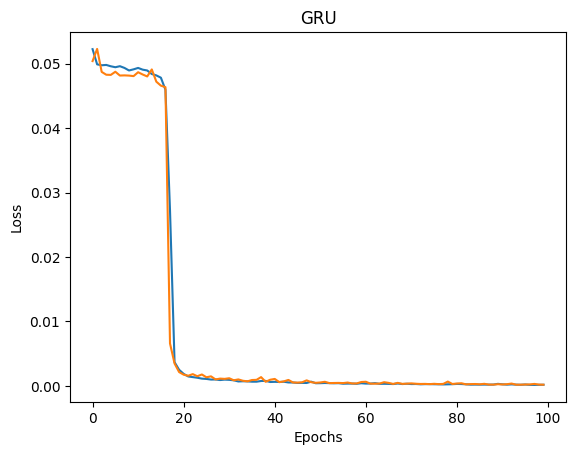

In [25]:
plot_learning_curves(rnn_history, "Simple RNN")
plot_learning_curves(lstm_history, "LSTM")
plot_learning_curves(gru_history, "GRU")